# CLIP transformer
Ths [CLIP transformer](https://arxiv.org/abs/2103.00020) was originally developed to classify images, with unknown classes at training time. On can use a pre-trained model for multiple classification tasks, by simply definint different classes at inference time.

This notebook is modified from example code [here](https://huggingface.co/docs/transformers/en/model_doc/clip).

In [1]:
from PIL import Image
import requests

In [2]:
from transformers import CLIPProcessor, CLIPModel

We first download a pre-trained model.

In [3]:
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

C:\Users\haase\mambaforge\envs\tea3\lib\site-packages\torch\_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


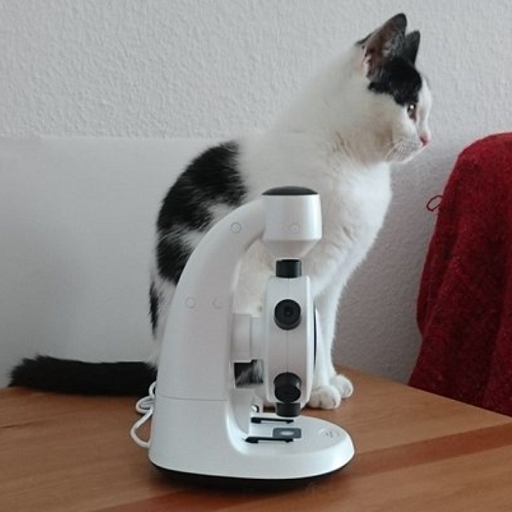

In [4]:
image = Image.open("data/real_cat.png")
image

In [5]:
options = ["a photo of a cat", 
           "a photo of a dog", 
           "a photo of a microscope"]

In [6]:
#options = ["a photo of a cat", 
#           "a photo of a dog"]

In [7]:
inputs = processor(text=options, images=image, return_tensors="pt", padding=True)
outputs = model(**inputs)

In [8]:
logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1)  # we can take the softmax to get the label probabilities
probs

tensor([[0.1353, 0.0013, 0.8634]], grad_fn=<SoftmaxBackward0>)

In [9]:
label_probabilities = {k: v for k, v in zip(options, probs[0].tolist())}

In [10]:
label_probabilities

{'a photo of a cat': 0.1352911740541458,
 'a photo of a dog': 0.0012659047497436404,
 'a photo of a microscope': 0.8634429574012756}